In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

In [3]:
# head of the required data for analysis
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


##### The Target variable is object type data , we need to change that to int, label encoding them would be okay since only 2 variables

In [4]:
# removing the column that is not required for anlaysis
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
print ('No of rows : ',data.shape[0],'\n''No. of Columns :', data.shape[1])

No of rows :  1525 
No. of Columns : 9


In [7]:
# checking for variables with null values

data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
# checking for the duplicated records
dups= data.duplicated().sum()
dups

8

1. the data can have duplicate records since it is a survey
2. Decided to keep the duplicates since it should not impact the result of the analysis
3. Also the no. of data points is not very large hence decreasing the size is not a good option

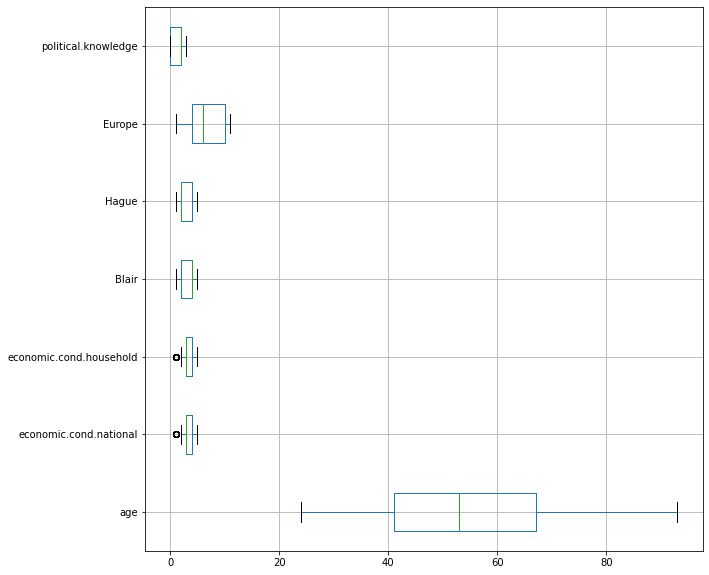

In [9]:
plt.figure(figsize=(10,10))
data.boxplot(vert=0)
plt.show()

In [10]:
Data_Dictionary = pd.read_excel('Election_Data.xlsx', sheet_name='Sheet1')
Data_Dictionary

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [11]:
Data_Dictionary[0:]

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [12]:
Data_Dictionary.columns

Index(['**Data Dictionary**'], dtype='object')

In [13]:
Data_Dictionary.index

RangeIndex(start=0, stop=9, step=1)

In [14]:
Data_Dictionary.columns.values[0]='Dictionary'

In [15]:
Data_Dictionary

,Dictionary
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [16]:
data.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [17]:
# renaming the column names to since they have dots "." in their names which are aligned with python and may cause problems

data= data.rename(columns={'economic.cond.national':'economic_cond_national'})
data= data.rename(columns={'economic.cond.household':'economic_cond_household'})
data= data.rename(columns={'political.knowledge':'political_knowledge'})

In [18]:
data.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

In [19]:
# Converting the numerical data to categorical as their nature 

data['economic_cond_national']= pd.Categorical(data.economic_cond_national)
data['economic_cond_household']= pd.Categorical(data.economic_cond_household)
data['political_knowledge']= pd.Categorical(data.political_knowledge)
data['Blair']= pd.Categorical(data.Blair)
data['Hague']= pd.Categorical(data.Hague)
data['Europe']= pd.Categorical(data.Europe)
data.dtypes


vote                         object
age                           int64
economic_cond_national     category
economic_cond_household    category
Blair                      category
Hague                      category
Europe                     category
political_knowledge        category
gender                       object
dtype: object

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1525 non-null   object  
 1   age                      1525 non-null   int64   
 2   economic_cond_national   1525 non-null   category
 3   economic_cond_household  1525 non-null   category
 4   Blair                    1525 non-null   category
 5   Hague                    1525 non-null   category
 6   Europe                   1525 non-null   category
 7   political_knowledge      1525 non-null   category
 8   gender                   1525 non-null   object  
dtypes: category(6), int64(1), object(2)
memory usage: 46.2+ KB


In [21]:
compcol= data[['economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge']]

In [22]:
# changing the data type to object for the categorical data to be able to Univariate Analysis separately for the numerical and the categorical data

data['economic_cond_national']=data.economic_cond_national.astype('object')
data['economic_cond_household']=data.economic_cond_household .astype('object')
data['political_knowledge']=data.political_knowledge.astype('object')
data['Blair']=data.Blair.astype('object')
data['Hague']=data.Hague.astype('object')
data['Europe']=data.Europe.astype('object')


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   object
 3   economic_cond_household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political_knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


In [24]:
cat =[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)


In [25]:
cat

['vote',
 'economic_cond_national',
 'economic_cond_household',
 'Blair',
 'Hague',
 'Europe',
 'political_knowledge',
 'gender']

In [26]:
num

['age']

In [27]:
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0


In [28]:
data[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
economic_cond_national,1525,5,3,607
economic_cond_household,1525,5,3,648
Blair,1525,5,4,836
Hague,1525,5,2,624
Europe,1525,11,11,338
political_knowledge,1525,4,2,782
gender,1525,2,female,812


In [29]:
def univariateanalysis (column,bins):
    print ('Description of '+ column)
    print ('--------------------------------------------------------------------------------------')
    print (data[column].describe(), end='')
       
    plt.figure()
    print ('Description of '+ column)
    print ('--------------------------------------------------------------------------------------')
    sns.distplot(data[column],kde= True, color = 'r');
    plt.show()
    
    plt.figure()
    print ('Boxplot of '+ column)
    print ('--------------------------------------------------------------------------------------')
    ax= sns.boxplot(x= data[column])
    plt.show()

In [30]:
def analysisforcat (column,bins):
    print ('Unique Values of'+ column)
    print ('-------------------------------------------------------------------------------------')
    print ('Total no. of unique values: ', (data[column].nunique()))
    print (data[column].value_counts(normalize= True, sort= False, ascending=True),end='')
    
    plt.figure()
    print ('Countplot of '+ column)
    print ('--------------------------------------------------------------------------------------')
    ax= sns.countplot(x=data[column]);
    plt.show()
    
    

Description of age
--------------------------------------------------------------------------------------
count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64Description of age
--------------------------------------------------------------------------------------


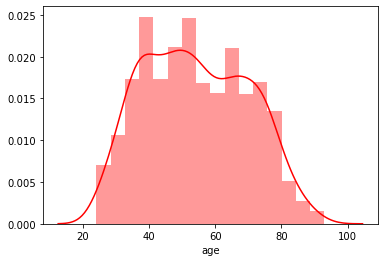

Boxplot of age
--------------------------------------------------------------------------------------


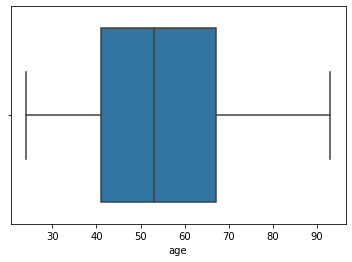

In [31]:
for i in num:
    univariateanalysis(i,20)
    

Unique Values ofvote
-------------------------------------------------------------------------------------
Total no. of unique values:  2
Conservative    0.302951
Labour          0.697049
Name: vote, dtype: float64Countplot of vote
--------------------------------------------------------------------------------------


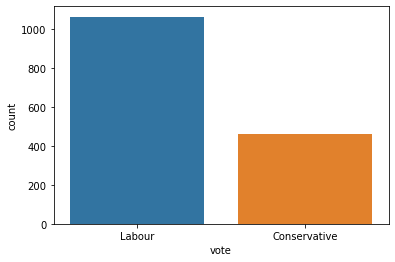

Unique Values ofeconomic_cond_national
-------------------------------------------------------------------------------------
Total no. of unique values:  5
1    0.024262
2    0.168525
3    0.398033
4    0.355410
5    0.053770
Name: economic_cond_national, dtype: float64Countplot of economic_cond_national
--------------------------------------------------------------------------------------


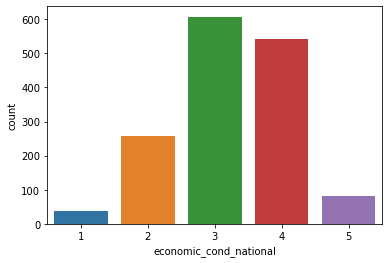

Unique Values ofeconomic_cond_household
-------------------------------------------------------------------------------------
Total no. of unique values:  5
1    0.042623
2    0.183607
3    0.424918
4    0.288525
5    0.060328
Name: economic_cond_household, dtype: float64Countplot of economic_cond_household
--------------------------------------------------------------------------------------


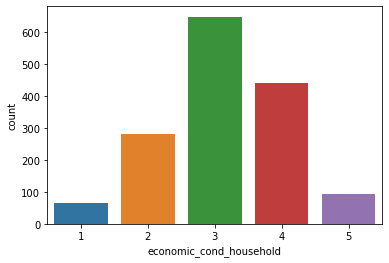

Unique Values ofBlair
-------------------------------------------------------------------------------------
Total no. of unique values:  5
1    0.063607
2    0.287213
3    0.000656
4    0.548197
5    0.100328
Name: Blair, dtype: float64Countplot of Blair
--------------------------------------------------------------------------------------


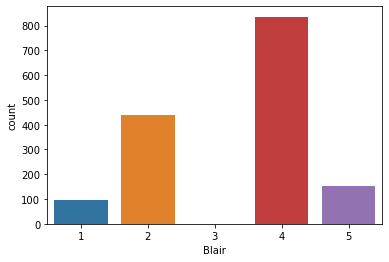

Unique Values ofHague
-------------------------------------------------------------------------------------
Total no. of unique values:  5
1    0.152787
2    0.409180
3    0.024262
4    0.365902
5    0.047869
Name: Hague, dtype: float64Countplot of Hague
--------------------------------------------------------------------------------------


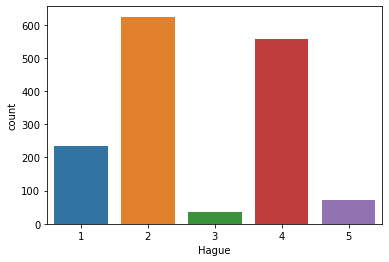

Unique Values ofEurope
-------------------------------------------------------------------------------------
Total no. of unique values:  11
1     0.071475
2     0.051803
3     0.084590
4     0.083279
5     0.081311
6     0.137049
7     0.056393
8     0.073443
9     0.072787
10    0.066230
11    0.221639
Name: Europe, dtype: float64Countplot of Europe
--------------------------------------------------------------------------------------


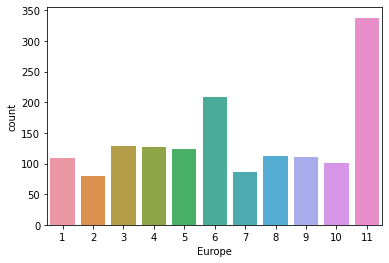

Unique Values ofpolitical_knowledge
-------------------------------------------------------------------------------------
Total no. of unique values:  4
0    0.298361
1    0.024918
2    0.512787
3    0.163934
Name: political_knowledge, dtype: float64Countplot of political_knowledge
--------------------------------------------------------------------------------------


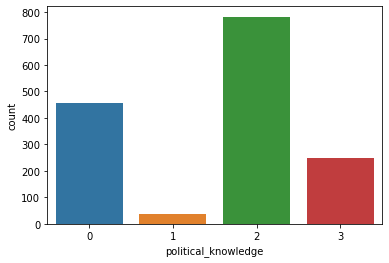

Unique Values ofgender
-------------------------------------------------------------------------------------
Total no. of unique values:  2
male      0.467541
female    0.532459
Name: gender, dtype: float64Countplot of gender
--------------------------------------------------------------------------------------


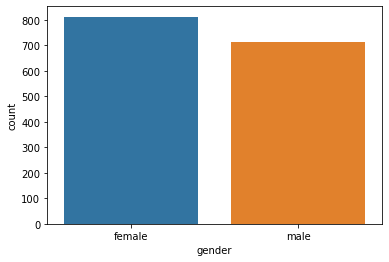

In [32]:
for i in cat:
    analysisforcat(i,20)

In [33]:
data['economic_cond_national']=data.economic_cond_national.astype('int')
data['economic_cond_household']=data.economic_cond_household .astype('int')
data['political_knowledge']=data.political_knowledge.astype('int')
data['Blair']=data.Blair.astype('int')
data['Hague']=data.Hague.astype('int')
data['Europe']=data.Europe.astype('int')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   int32 
 3   economic_cond_household  1525 non-null   int32 
 4   Blair                    1525 non-null   int32 
 5   Hague                    1525 non-null   int32 
 6   Europe                   1525 non-null   int32 
 7   political_knowledge      1525 non-null   int32 
 8   gender                   1525 non-null   object
dtypes: int32(6), int64(1), object(2)
memory usage: 71.6+ KB


Description of economic_cond_national
--------------------------------------------------------------------------------------
count    1525.000000
mean        3.245902
std         0.880969
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic_cond_national, dtype: float64Description of economic_cond_national
--------------------------------------------------------------------------------------


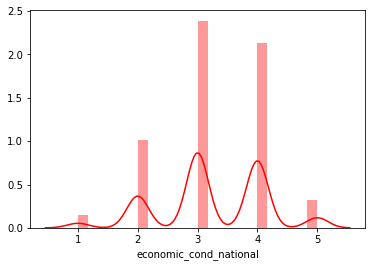

Boxplot of economic_cond_national
--------------------------------------------------------------------------------------


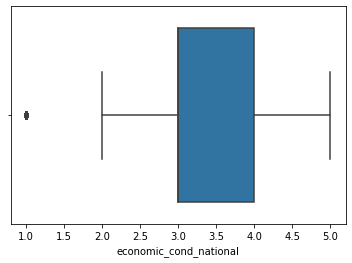

Description of economic_cond_household
--------------------------------------------------------------------------------------
count    1525.000000
mean        3.140328
std         0.929951
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic_cond_household, dtype: float64Description of economic_cond_household
--------------------------------------------------------------------------------------


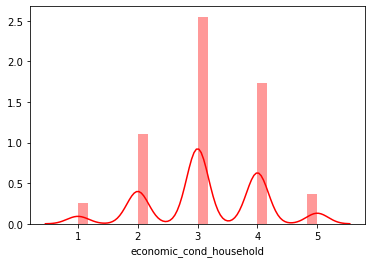

Boxplot of economic_cond_household
--------------------------------------------------------------------------------------


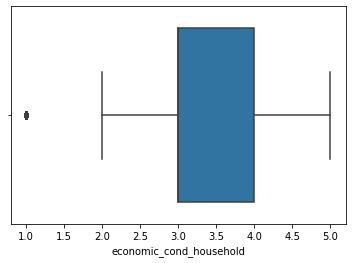

Description of Blair
--------------------------------------------------------------------------------------
count    1525.000000
mean        3.334426
std         1.174824
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64Description of Blair
--------------------------------------------------------------------------------------


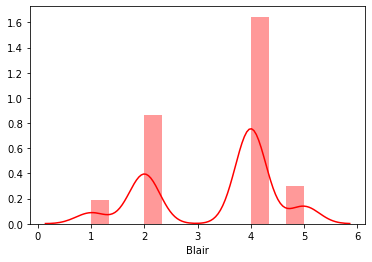

Boxplot of Blair
--------------------------------------------------------------------------------------


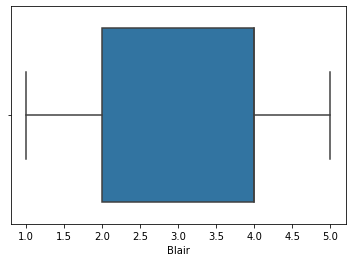

Description of Hague
--------------------------------------------------------------------------------------
count    1525.000000
mean        2.746885
std         1.230703
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64Description of Hague
--------------------------------------------------------------------------------------


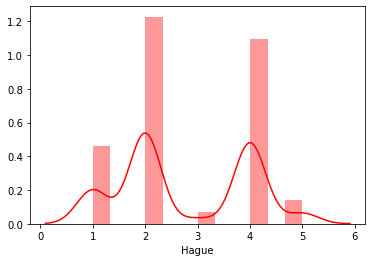

Boxplot of Hague
--------------------------------------------------------------------------------------


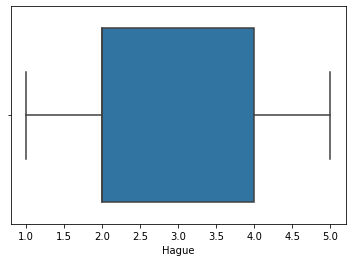

Description of Europe
--------------------------------------------------------------------------------------
count    1525.000000
mean        6.728525
std         3.297538
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64Description of Europe
--------------------------------------------------------------------------------------


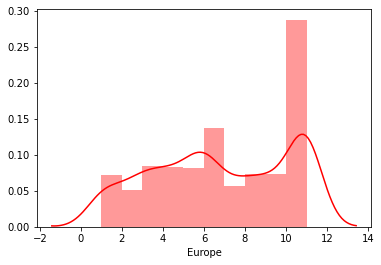

Boxplot of Europe
--------------------------------------------------------------------------------------


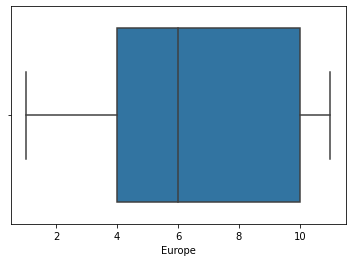

Description of political_knowledge
--------------------------------------------------------------------------------------
count    1525.000000
mean        1.542295
std         1.083315
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political_knowledge, dtype: float64Description of political_knowledge
--------------------------------------------------------------------------------------


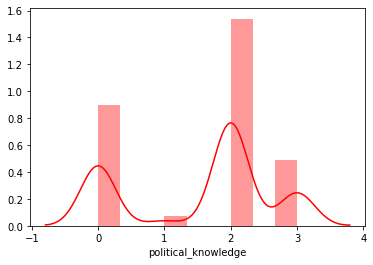

Boxplot of political_knowledge
--------------------------------------------------------------------------------------


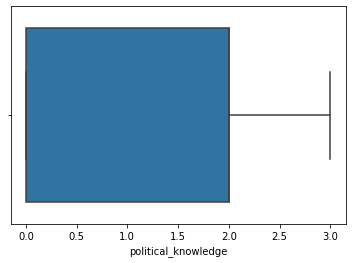

In [35]:
for i in compcol:
    univariateanalysis(i,20)

In [36]:
data['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

#### 1. The ctaegorical features other than gender and vote is ordinal in nature and the data provided is assumed to be in correct order
#### 2. Outliers are in the variabels economic_cond_national and economic_cond_household that needs treatment
#### 3. Scaling is required and should be applied to the required algorithms after the split
#### 4. Dups were not deleted as there is a possiblity of dups with the kind of data and the variables selected
#### 5. No null values were identified
#### 6. Variables with string values vote and gender will be encoed with pd .get_dummies(drop_first=True) 
#### 7. The data mostly is left skewed which is expected as the nature of the data is, higher proportion of the population ranks low in the categories
#### 8. The target variable is not evenly matched i.e and shows skewness 70:30 which is a very high margin. Ensembling techniques will help to overcome this. SMOTE can be used to get rid of the variance.



C:\Users\sanjay singh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sanjay singh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 864x648 with 0 Axes>

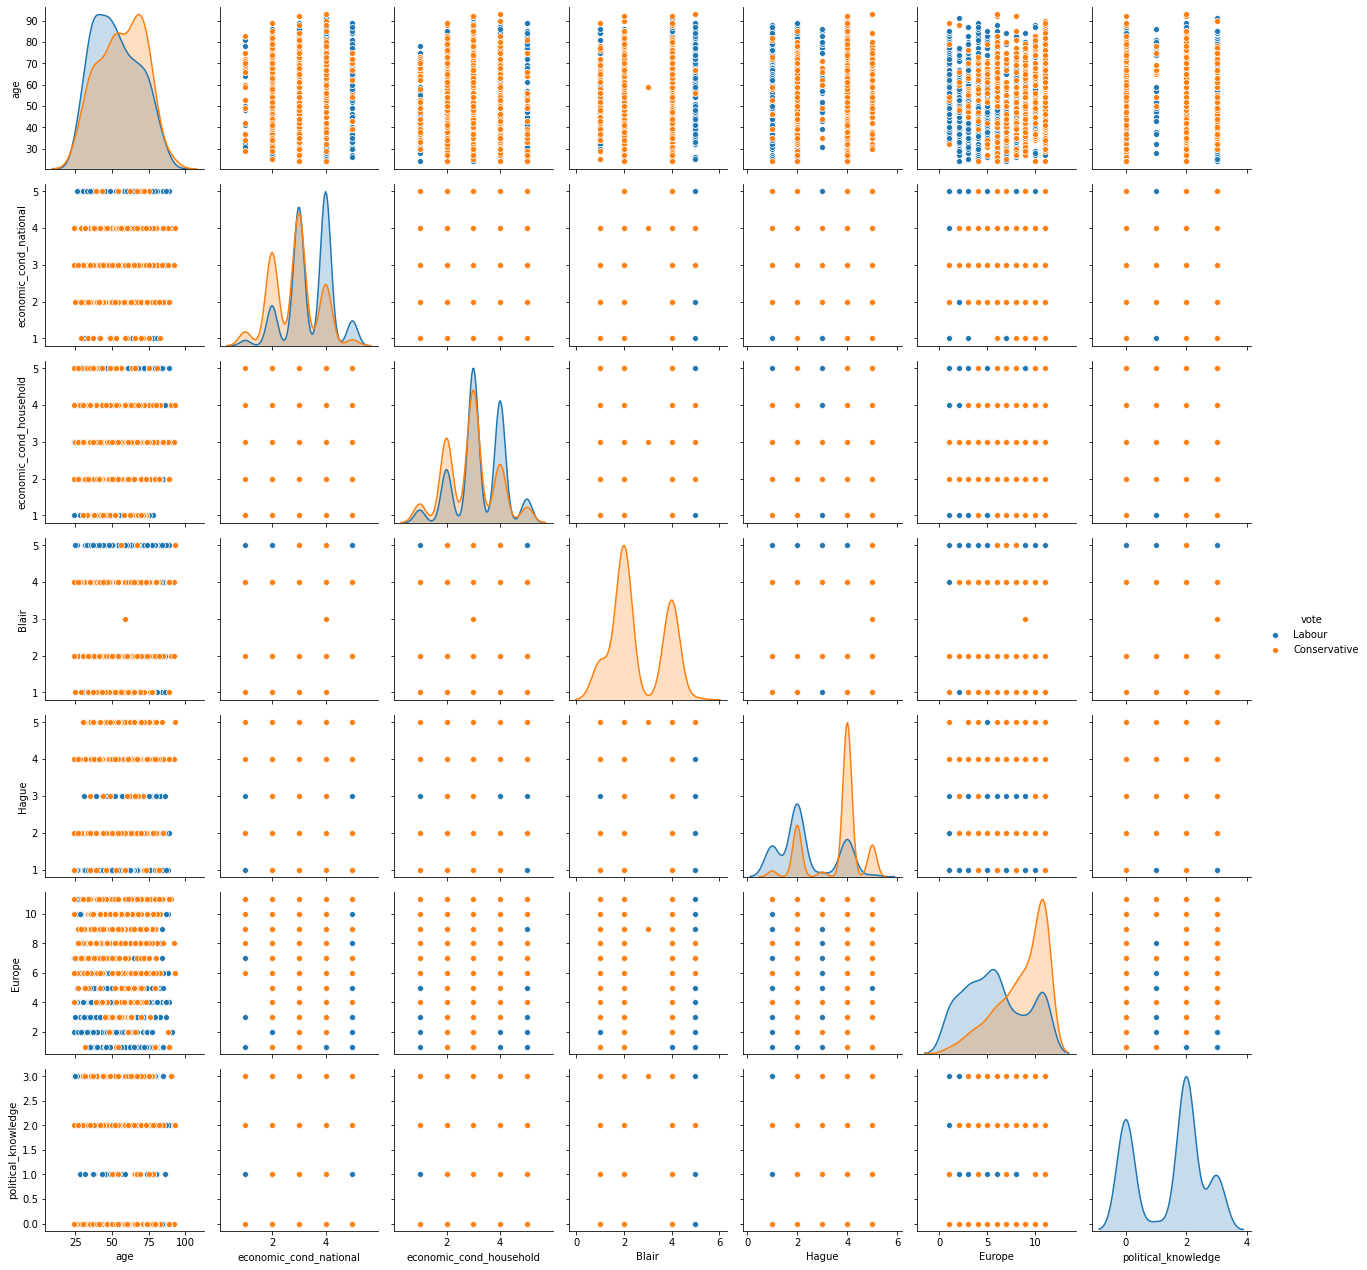

In [37]:
plt.figure(figsize=(12,9))
ax= sns.pairplot(data,diag_kind='kde', hue='vote')
plt.show();

In [38]:
def corr_matrix():
    plt.figure(figsize=(11,9))
    corr_matrix=data.corr()
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)]=True
    sns.heatmap(corr_matrix, annot=True,mask = mask, square=True)

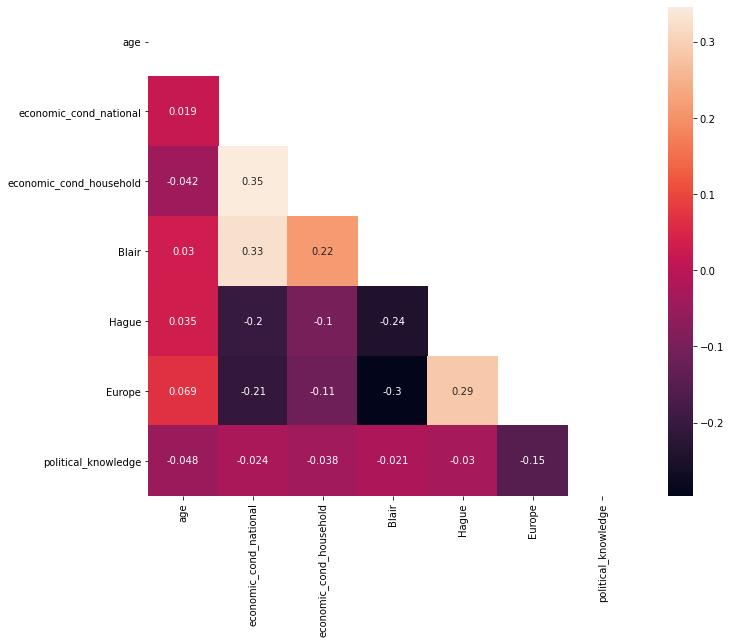

In [39]:
corr_matrix()

1. label encoding of the target variable
2. remove duplicates
3. Treat outliers as we are applying the data to multiple models
4. encode with dummies the gender variable.
5. convert the data to categrical and datatype as int

In [40]:
data.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   int32 
 3   economic_cond_household  1525 non-null   int32 
 4   Blair                    1525 non-null   int32 
 5   Hague                    1525 non-null   int32 
 6   Europe                   1525 non-null   int32 
 7   political_knowledge      1525 non-null   int32 
 8   gender                   1525 non-null   object
dtypes: int32(6), int64(1), object(2)
memory usage: 71.6+ KB


In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
data.vote=le.fit_transform(data.vote)

In [44]:
data.head(2)

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
0,1,43,3,3,4,1,2,2,female
1,1,36,4,4,4,4,5,2,male


In [45]:
data['vote'].value_counts()

1    1063
0     462
Name: vote, dtype: int64

In [46]:
data= pd.get_dummies(data, columns = ['gender'], drop_first= True, )

In [47]:
data.head()

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [48]:
data.drop_duplicates(inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int32
 1   age                      1517 non-null   int64
 2   economic_cond_national   1517 non-null   int32
 3   economic_cond_household  1517 non-null   int32
 4   Blair                    1517 non-null   int32
 5   Hague                    1517 non-null   int32
 6   Europe                   1517 non-null   int32
 7   political_knowledge      1517 non-null   int32
 8   gender_male              1517 non-null   uint8
dtypes: int32(7), int64(1), uint8(1)
memory usage: 66.7 KB


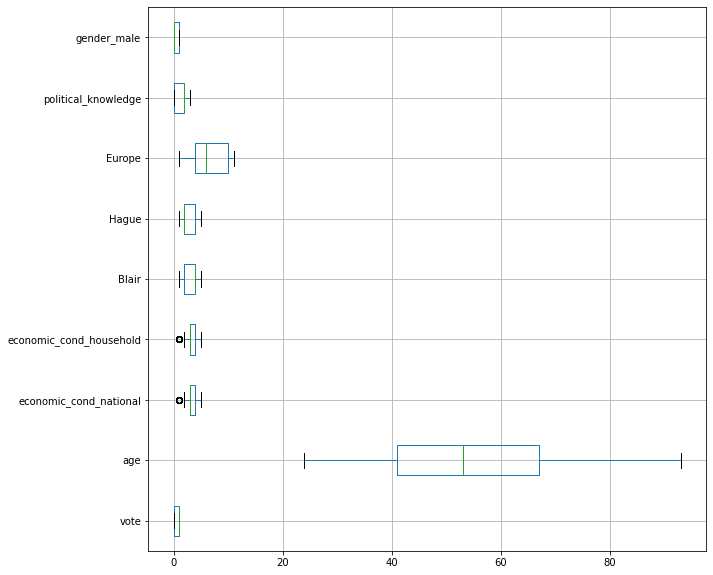

In [50]:
plt.figure(figsize=(10,10))
data.boxplot(vert=0)
plt.show()

In [51]:
def remove_outlier (col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [52]:
for column in data.columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

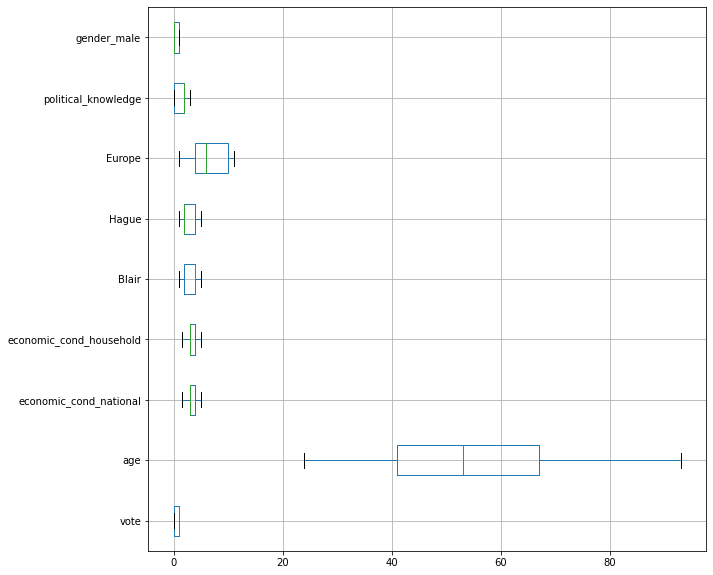

In [53]:
plt.figure(figsize=(10,10))
data.boxplot(vert=0)
plt.show()

Description of vote
--------------------------------------------------------------------------------------
count    1517.000000
mean        0.696770
std         0.459805
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: vote, dtype: float64Description of vote
--------------------------------------------------------------------------------------


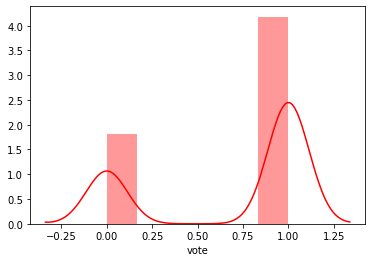

Boxplot of vote
--------------------------------------------------------------------------------------


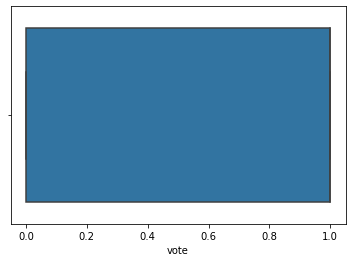

Description of age
--------------------------------------------------------------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64Description of age
--------------------------------------------------------------------------------------


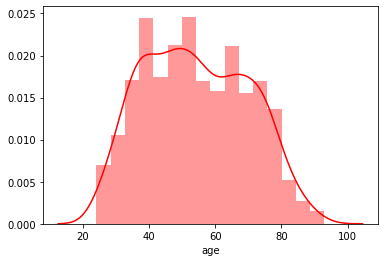

Boxplot of age
--------------------------------------------------------------------------------------


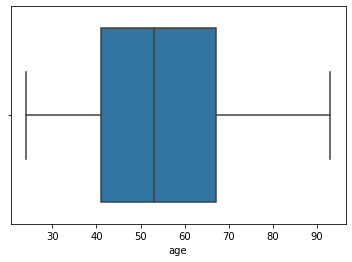

Description of economic_cond_national
--------------------------------------------------------------------------------------
count    1517.000000
mean        3.257416
std         0.853647
min         1.500000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic_cond_national, dtype: float64Description of economic_cond_national
--------------------------------------------------------------------------------------


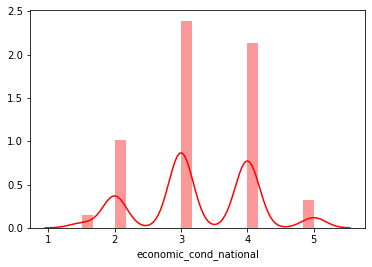

Boxplot of economic_cond_national
--------------------------------------------------------------------------------------


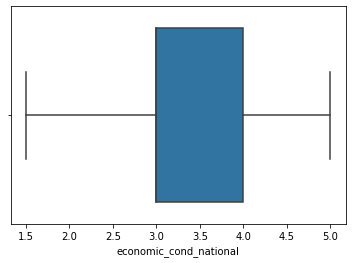

Description of economic_cond_household
--------------------------------------------------------------------------------------
count    1517.000000
mean        3.159196
std         0.886279
min         1.500000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic_cond_household, dtype: float64Description of economic_cond_household
--------------------------------------------------------------------------------------


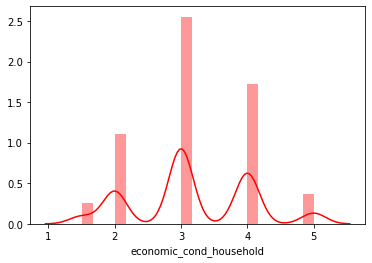

Boxplot of economic_cond_household
--------------------------------------------------------------------------------------


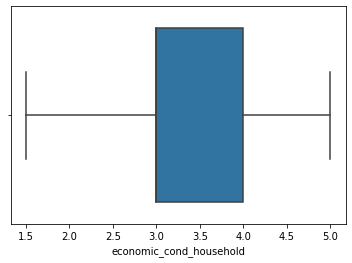

Description of Blair
--------------------------------------------------------------------------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64Description of Blair
--------------------------------------------------------------------------------------


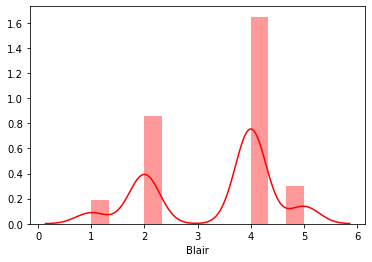

Boxplot of Blair
--------------------------------------------------------------------------------------


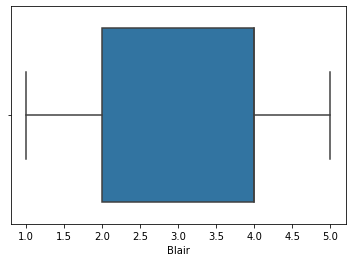

Description of Hague
--------------------------------------------------------------------------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64Description of Hague
--------------------------------------------------------------------------------------


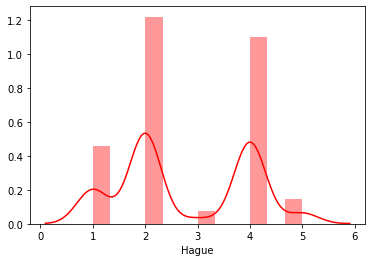

Boxplot of Hague
--------------------------------------------------------------------------------------


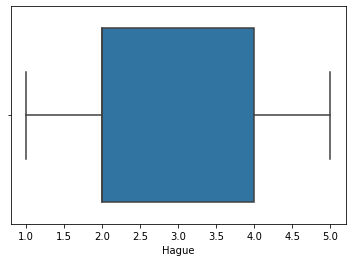

Description of Europe
--------------------------------------------------------------------------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64Description of Europe
--------------------------------------------------------------------------------------


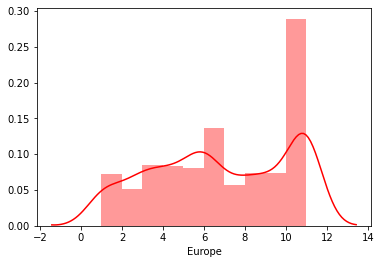

Boxplot of Europe
--------------------------------------------------------------------------------------


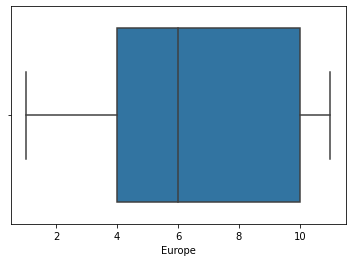

Description of political_knowledge
--------------------------------------------------------------------------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political_knowledge, dtype: float64Description of political_knowledge
--------------------------------------------------------------------------------------


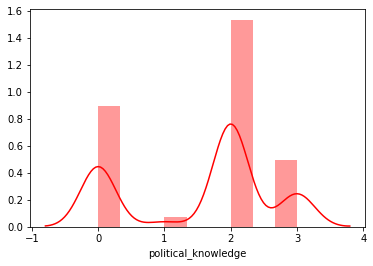

Boxplot of political_knowledge
--------------------------------------------------------------------------------------


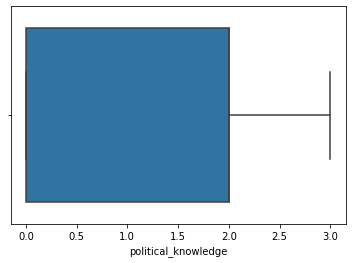

Description of gender_male
--------------------------------------------------------------------------------------
count    1517.000000
mean        0.467370
std         0.499099
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: gender_male, dtype: float64Description of gender_male
--------------------------------------------------------------------------------------


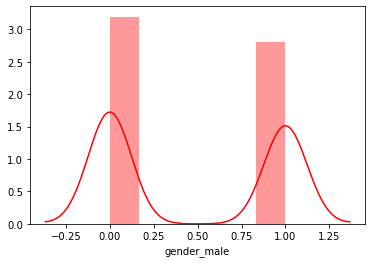

Boxplot of gender_male
--------------------------------------------------------------------------------------


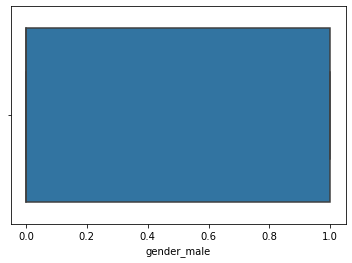

In [54]:
for i in data.columns:
    univariateanalysis(i,20)

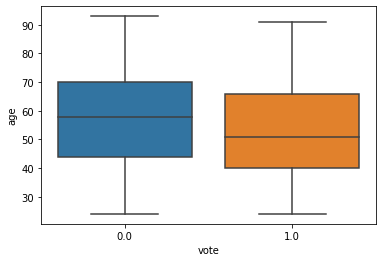

In [55]:
sns.boxplot(data["vote"],data['age']) 
    

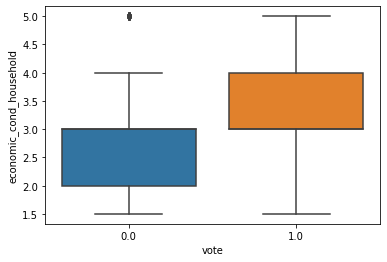

In [56]:
sns.boxplot(data["vote"],data['economic_cond_household'])


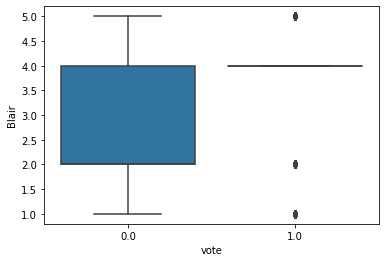

In [57]:
sns.boxplot(data["vote"],data['Blair'])


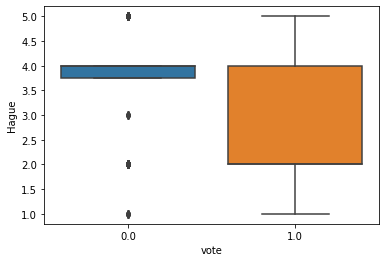

In [58]:
sns.boxplot(data["vote"],data['Hague'])


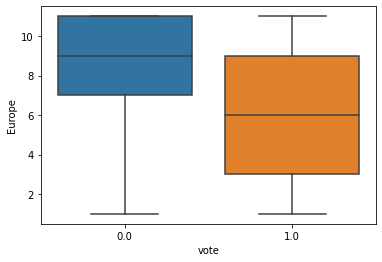

In [59]:
sns.boxplot(data["vote"],data['Europe'])


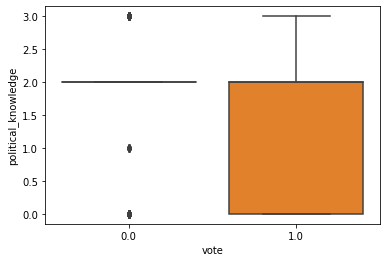

In [60]:
sns.boxplot(data["vote"],data['political_knowledge'])


In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1517.0,0.696770,0.459805,0.0,0.0,1.0,1.0,1.0
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic_cond_national,1517.0,3.257416,0.853647,1.5,3.0,3.0,4.0,5.0
economic_cond_household,1517.0,3.159196,0.886279,1.5,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political_knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender_male,1517.0,0.467370,0.499099,0.0,0.0,0.0,1.0,1.0


C:\Users\sanjay singh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sanjay singh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 864x648 with 0 Axes>

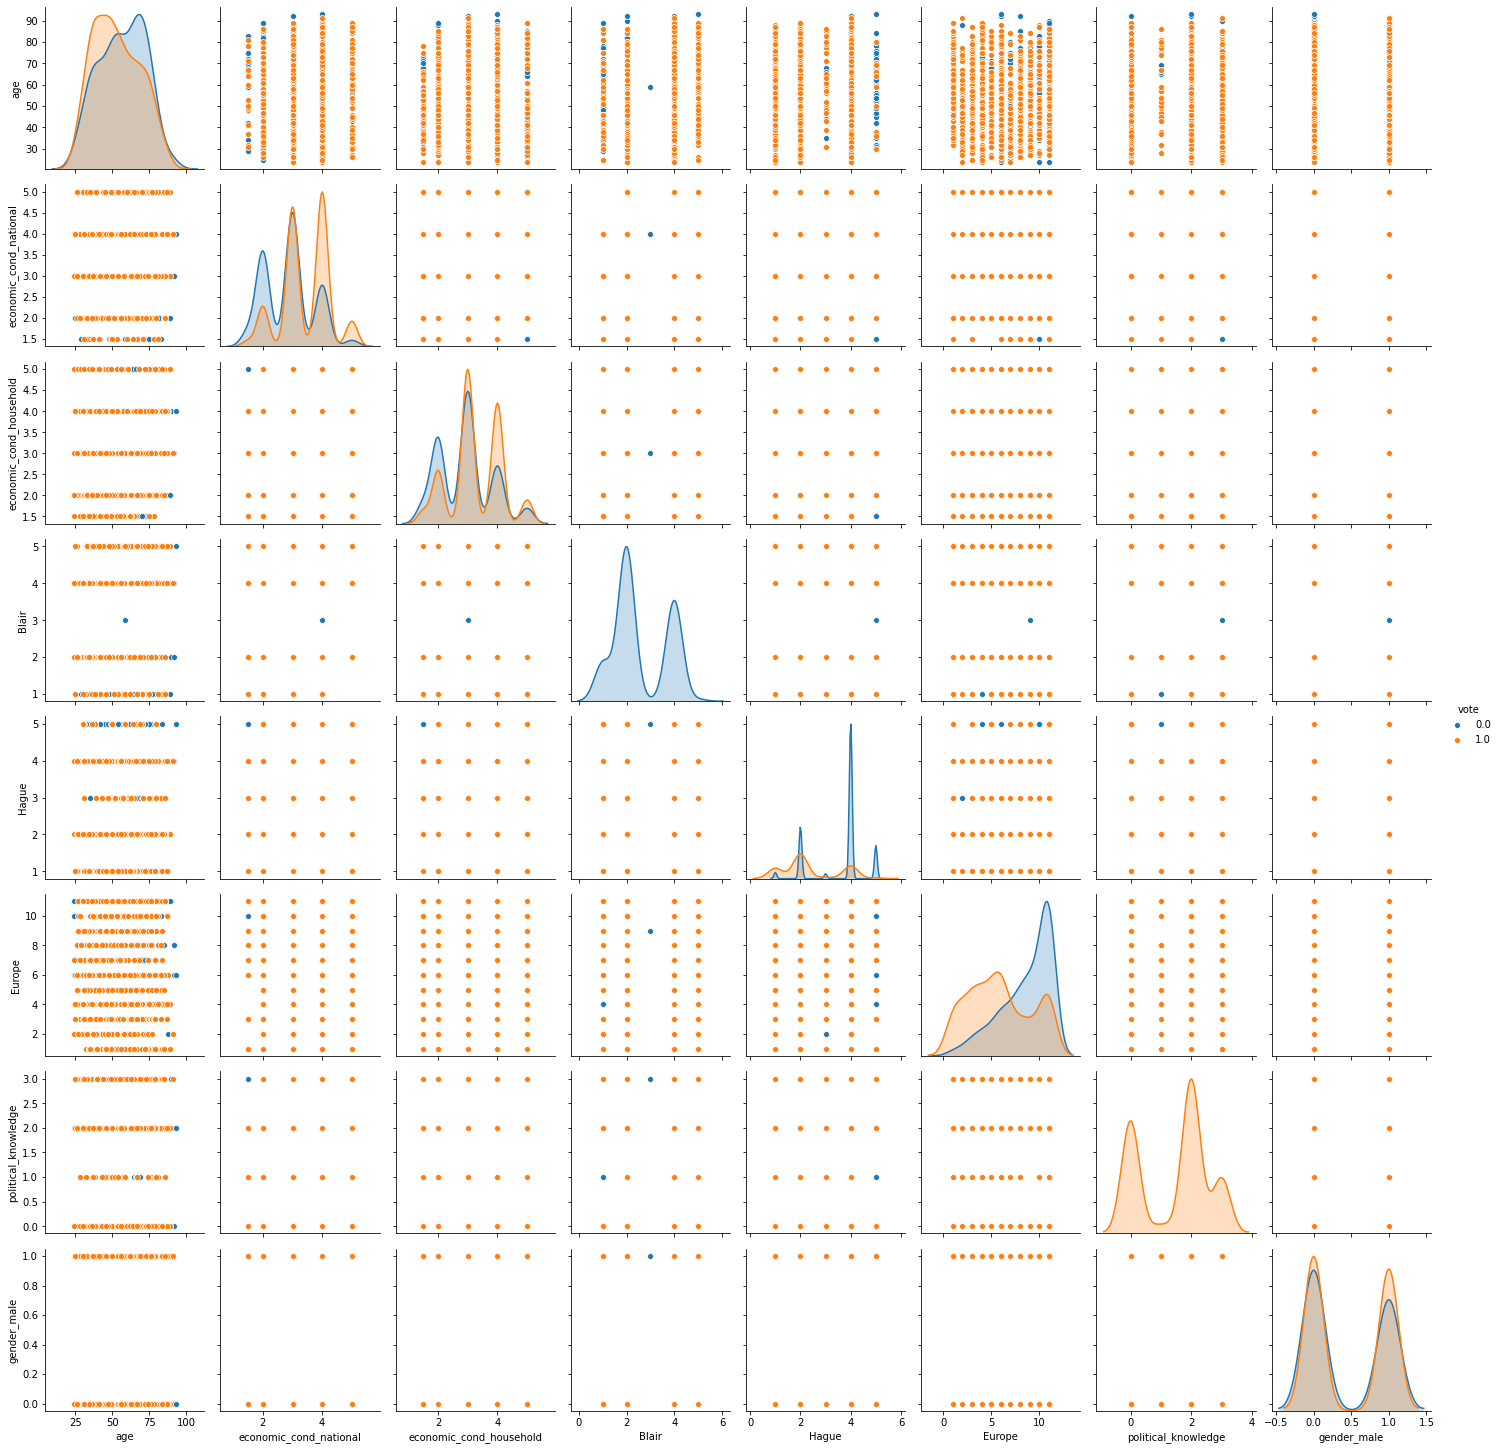

In [62]:
plt.figure(figsize=(12,9))
ax= sns.pairplot(data,diag_kind='kde', hue='vote')
plt.show();

In [63]:
def corr_matrix():
    plt.figure(figsize=(11,9))
    corr_matrix=data.corr()
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)]=True
    sns.heatmap(corr_matrix, annot=True,mask = mask, square=True)

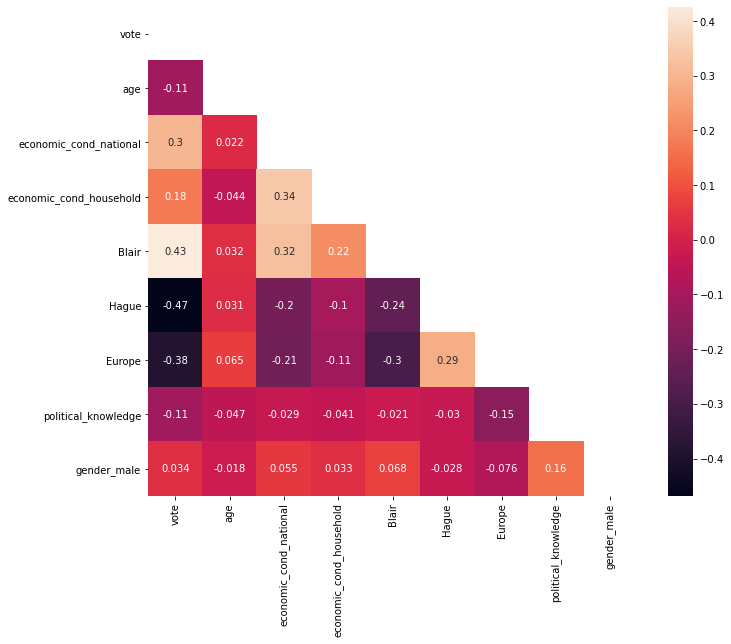

In [64]:
corr_matrix()

### Logistic Regression

In [65]:
# dropping the target from the data

x= data.drop('vote', axis=1)
y= data['vote']

In [66]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test,train_labels, test_labels =train_test_split(x,y, test_size =0.30, random_state=1)


In [67]:
test_labels.value_counts()

1.0    303
0.0    153
Name: vote, dtype: int64

In [68]:
train_labels.value_counts()

1.0    754
0.0    307
Name: vote, dtype: int64

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [70]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(x_train, train_labels)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [71]:
train_predict =model.predict(x_train)
test_predict = model.predict(x_test)

In [72]:
# probabilities of the predcition on test data
test_predict_prob= model.predict_proba(x_test)

In [73]:
pd.DataFrame(test_predict_prob).head()

,0,1
0,0.426549,0.573451
1,0.151457,0.848543
2,0.006491,0.993509
3,0.842674,0.157326
4,0.063533,0.936467


In [74]:
# Scores in training and test data
model.score(x_train,train_labels)

0.8341187558906692

In [75]:
model.score(x_test,test_labels)

0.8289473684210527

AUC : 0.8904


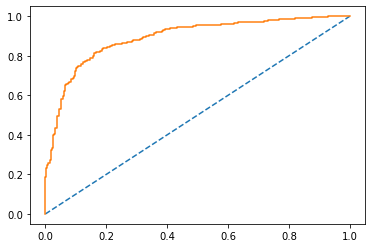

              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



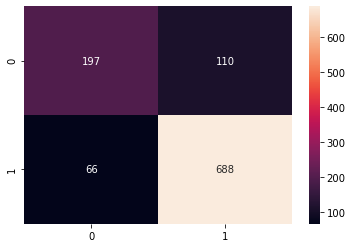

In [76]:
# AUC,ROC, classification report and confusion matrix for the training data

prob= model.predict_proba(x_train)
prob=prob[:, 1]
auc =roc_auc_score(train_labels, prob)
print ('AUC : %.4f'% auc)
train_fpr, train_tpr, train_thresholds= roc_curve(train_labels, prob)
plt.plot([0,1],[0,1], linestyle= '--')
plt.plot(train_fpr,train_tpr)
plt.show()

cnf_mat_train =metrics.confusion_matrix(train_labels,train_predict)
sns.heatmap(cnf_mat_train, annot=True, fmt ='.5g')
cls_report_train=metrics.classification_report(train_labels, train_predict)
print (cls_report_train)

AUC : 0.8828


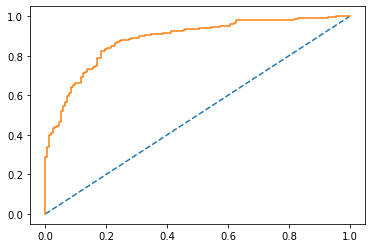

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



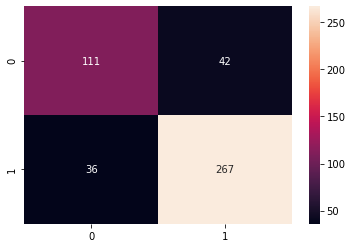

In [77]:
prob= model.predict_proba(x_test)
prob=prob[:, 1]
auc =roc_auc_score(test_labels, prob)
print ('AUC : %.4f'% auc)
test_fpr, test_tpr, test_thresholds= roc_curve(test_labels, prob)
plt.plot([0,1],[0,1], linestyle= '--')
plt.plot(test_fpr,test_tpr)
plt.show()

cnf_mat_test =metrics.confusion_matrix(test_labels,test_predict)
sns.heatmap(cnf_mat_test, annot=True, fmt ='.5g')
cls_report_test=metrics.classification_report(test_labels, test_predict)
print (cls_report_test)

1. Overall the train and test scores are in line
2. Recall in these cases are maintained. 
3. Will try to use a different solver.

In [78]:
optimal_idx = np.argmax(train_tpr - train_fpr)
optimal_threshold = train_thresholds[optimal_idx]
optimal_threshold

0.7250223063806966

In [79]:
train_predict=[]
for i in range(0,len(prob)):
    if np.array(prob)[i]>0.72:
        a=1
    else:
        a=0
    train_predict.append(a)

In [80]:
cnf_mat_train =metrics.confusion_matrix(train_labels,train_predict)
sns.heatmap(cnf_mat_train, annot=True, fmt ='.5g')

ValueError: Found input variables with inconsistent numbers of samples: [1061, 456]

In [81]:
model = LogisticRegression(max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(x_train, train_labels)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', verbose=True)

In [82]:
train_predict =model.predict(x_train)
test_predict = model.predict(x_test)

In [83]:
test_predict_prob= model.predict_proba(x_test)

AUC : 0.8904


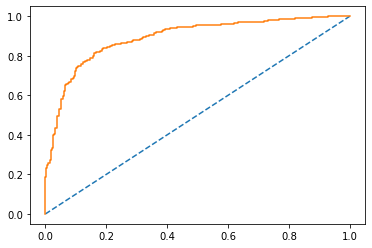

              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



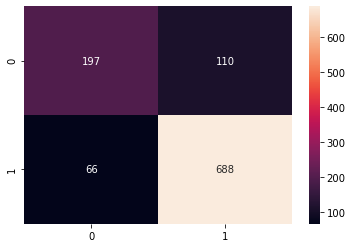

In [84]:
prob= model.predict_proba(x_train)
prob=prob[:, 1]
auc =roc_auc_score(train_labels, prob)
print ('AUC : %.4f'% auc)
train_fpr, train_tpr, train_thresholds= roc_curve(train_labels, prob)
plt.plot([0,1],[0,1], linestyle= '--')
plt.plot(train_fpr,train_tpr)
plt.show()

cnf_mat_train =metrics.confusion_matrix(train_labels,train_predict)
sns.heatmap(cnf_mat_train, annot=True, fmt ='.5g')
cls_report_train=metrics.classification_report(train_labels, train_predict)
print (cls_report_train)

AUC : 0.8828


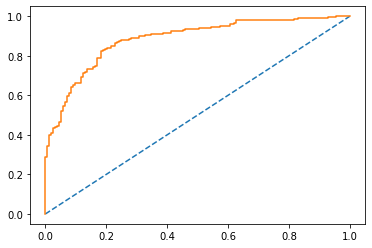

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



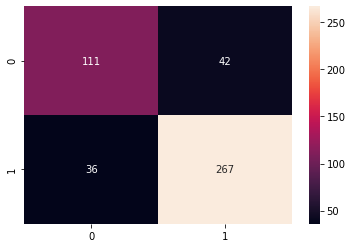

In [85]:
prob= model.predict_proba(x_test)
prob=prob[:, 1]
auc =roc_auc_score(test_labels, prob)
print ('AUC : %.4f'% auc)
test_fpr, test_tpr, test_thresholds= roc_curve(test_labels, prob)
plt.plot([0,1],[0,1], linestyle= '--')
plt.plot(test_fpr,test_tpr)
plt.show()

cnf_mat_test =metrics.confusion_matrix(test_labels,test_predict)
sns.heatmap(cnf_mat_test, annot=True, fmt ='.5g')
cls_report_test=metrics.classification_report(test_labels, test_predict)
print (cls_report_test)

In [86]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [87]:
x_train_scaled= ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

# LDA 

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [89]:
lda= LinearDiscriminantAnalysis()
model= lda.fit(x_train_scaled, train_labels)

In [90]:
pred_lda_train= model.predict(x_train_scaled)
pred_lda_test= model.predict(x_test_scaled)


              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



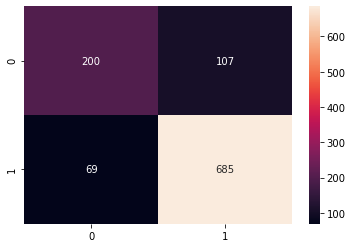

In [91]:
cnf_mat_train =metrics.confusion_matrix(train_labels,pred_lda_train)
sns.heatmap(cnf_mat_train, annot=True, fmt ='.5g')
cls_report_train=metrics.classification_report(train_labels, pred_lda_train)
print (cls_report_train)

In [92]:
lda_pred_prob_train = model.predict_proba(x_train_scaled)
lda_pred_prob_test = model.predict_proba(x_test_scaled)

In [93]:
lda_pred_prob_train[:,1]

array([0.04973366, 0.92243861, 0.69491333, ..., 0.77989739, 0.78940481,
       0.98130104])

0.889942024728052

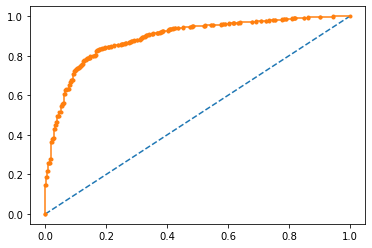

In [94]:
auc = metrics.roc_auc_score(train_labels, lda_pred_prob_train[:,1])
fpr,tpr,thresholds = metrics.roc_curve(train_labels,lda_pred_prob_train[:,1] )
plt.plot([0,1],[0,1], linestyle ='--')
plt.plot(fpr,tpr,marker='.', label= 'Training Data')
auc


              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



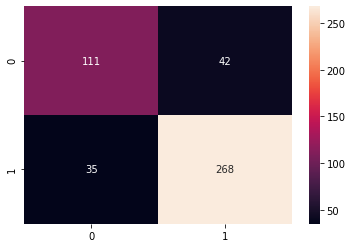

In [95]:
cnf_mat_test =metrics.confusion_matrix(test_labels,pred_lda_test)
sns.heatmap(cnf_mat_test, annot=True, fmt ='.5g')
cls_report_test=metrics.classification_report(test_labels, pred_lda_test)
print (cls_report_test)

0.8875299294635347

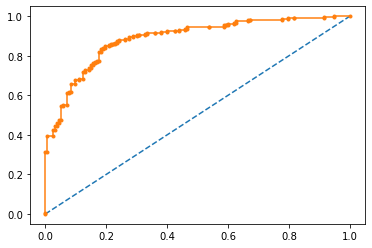

In [96]:
auc = metrics.roc_auc_score(test_labels, lda_pred_prob_test[:,1])
fpr,tpr,thresholds = metrics.roc_curve(test_labels,lda_pred_prob_test[:,1] )
plt.plot([0,1],[0,1], linestyle ='--')
plt.plot(fpr,tpr,marker='.', label= 'TEST DATA')
auc

The model accuracy on the training as well as the test set is about 89%, which is roughly the same proportion as the class 0 observations in the dataset. This model is affected by a class imbalance problem. Since we only have 1517 observations, if re-build the same LDA model with more number of data points, an even better model could be built.

We will build some other models to check the performance of the same. It has performed almost equivalent to the Logisitic Regression Model

# NB model (Gaussian NB)

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
gnb= GaussianNB()

In [99]:
gnb.fit(x_train, train_labels)

GaussianNB()

In [100]:
gnb_pred_train = gnb.predict(x_train)

In [101]:
gnb_score = gnb.score(x_train, train_labels)
gnb_score

0.8341187558906692

              precision    recall  f1-score   support

         0.0       0.72      0.69      0.71       307
         1.0       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



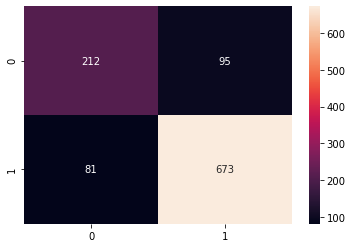

In [102]:
cnf_mat_train =metrics.confusion_matrix(train_labels,gnb_pred_train)
sns.heatmap(cnf_mat_train, annot=True, fmt ='.5g')
cls_report_train=metrics.classification_report(train_labels, gnb_pred_train)
print (cls_report_train)

In [103]:
gnb_pred_test = gnb.predict(x_test)

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       153
         1.0       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



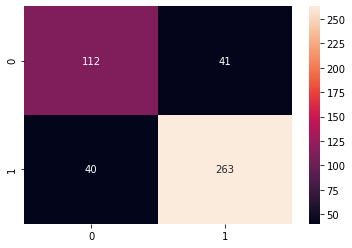

In [104]:
cnf_mat_train =metrics.confusion_matrix(test_labels,gnb_pred_test)
sns.heatmap(cnf_mat_train, annot=True, fmt ='.5g')
cls_report_test=metrics.classification_report(test_labels, gnb_pred_test)
print (cls_report_test)

# KNN Classfier

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn_model= KNeighborsClassifier()

In [107]:
knn_model.fit(x_train_scaled,train_labels)

KNeighborsClassifier()

THE ACCURACY SCORE TRAINING SET=  0.8548539114043355
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74       307
         1.0       0.88      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



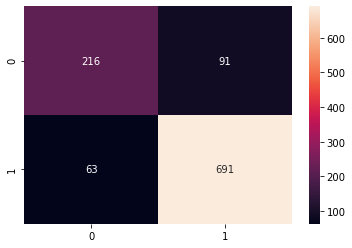

In [108]:
y_knn_pred= knn_model.predict(x_train_scaled)
score= knn_model.score(x_train_scaled, train_labels)
print('THE ACCURACY SCORE TRAINING SET= ',score)
cnf_knnmat_train= metrics.confusion_matrix(train_labels,y_knn_pred)
sns.heatmap(cnf_knnmat_train, annot=True, fmt='.5g')
cls_knnrep_train= metrics.classification_report(train_labels, y_knn_pred)
print(cls_knnrep_train)

THE ACCURACY SCORE TEST SET=  0.8245614035087719
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



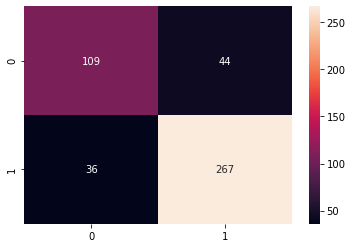

In [109]:
y_knntest_pred= knn_model.predict(x_test_scaled)
t_score= knn_model.score(x_test_scaled, test_labels)
print('THE ACCURACY SCORE TEST SET= ',t_score)
cnf_knnmat_test= metrics.confusion_matrix(test_labels,y_knntest_pred)
sns.heatmap(cnf_knnmat_test, annot=True, fmt='.5g')
cls_knnrep_test= metrics.classification_report(test_labels, y_knntest_pred)
print(cls_knnrep_test)

In [110]:
knn_model7= KNeighborsClassifier(n_neighbors=7)
knn_model7.fit(x_train_scaled, train_labels)

KNeighborsClassifier(n_neighbors=7)

THE ACCURACY SCORE TRAINING SET=  0.8539114043355325
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74       307
         1.0       0.89      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



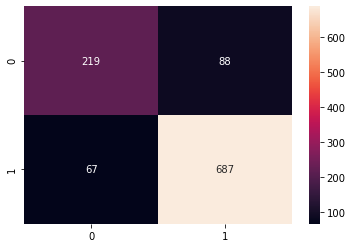

In [111]:
y_knn7_pred= knn_model7.predict(x_train_scaled)
score= knn_model7.score(x_train_scaled, train_labels)
print('THE ACCURACY SCORE TRAINING SET= ',score)
cnf_knnmat7_train= metrics.confusion_matrix(train_labels,y_knn7_pred)
sns.heatmap(cnf_knnmat7_train, annot=True, fmt='.5g')
cls_knnrep7_train= metrics.classification_report(train_labels, y_knn7_pred)
print(cls_knnrep7_train)

THE ACCURACY SCORE TEST SET=  0.8179824561403509
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73       153
         1.0       0.86      0.87      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



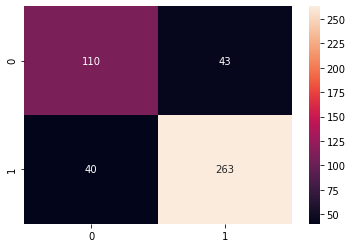

In [112]:
y_knn7_pred_test= knn_model7.predict(x_test_scaled)
score= knn_model7.score(x_test_scaled, test_labels)
print('THE ACCURACY SCORE TEST SET= ',score)
cnf_knnmat7_test= metrics.confusion_matrix(test_labels,y_knn7_pred_test)
sns.heatmap(cnf_knnmat7_test, annot=True, fmt='.5g')
cls_knnrep7_test= metrics.classification_report(test_labels, y_knn7_pred_test)
print(cls_knnrep7_test)

In [113]:
ac_scores=[]
for k in range (1,25,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled,train_labels)
    scores=knn.score(x_test_scaled,test_labels)
    ac_scores.append(scores)

In [114]:
ac_scores

[0.7828947368421053,
 0.8048245614035088,
 0.8245614035087719,
 0.8179824561403509,
 0.8157894736842105,
 0.8267543859649122,
 0.8223684210526315,
 0.8333333333333334,
 0.8333333333333334,
 0.8245614035087719,
 0.8355263157894737,
 0.8333333333333334]

In [115]:
mce=[1- x for x in ac_scores]
mce

[0.2171052631578947,
 0.19517543859649122,
 0.17543859649122806,
 0.18201754385964908,
 0.1842105263157895,
 0.17324561403508776,
 0.17763157894736847,
 0.16666666666666663,
 0.16666666666666663,
 0.17543859649122806,
 0.16447368421052633,
 0.16666666666666663]

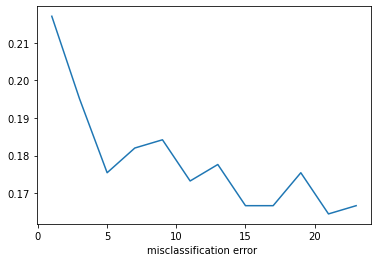

In [116]:
plt.plot(range(1,25,2),mce)
plt.xlabel('No. of Neighbors k ')
plt.xlabel('misclassification error ')
plt.show()

In [117]:
knn_model15= KNeighborsClassifier(n_neighbors=15)
knn_model15.fit(x_train_scaled, train_labels)

KNeighborsClassifier(n_neighbors=15)

THE ACCURACY SCORE TRAINING SET=  0.8369462770970783
              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70       307
         1.0       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



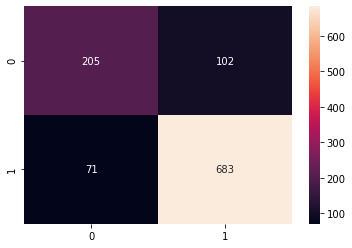

In [118]:
y_kn_pred= knn_model15.predict(x_train_scaled)
score= knn_model15.score(x_train_scaled, train_labels)
print('THE ACCURACY SCORE TRAINING SET= ',score)
cnf_kn15_train= metrics.confusion_matrix(train_labels,y_kn_pred)
sns.heatmap(cnf_kn15_train, annot=True, fmt='.5g')
cls_kn15_train= metrics.classification_report(train_labels, y_kn_pred)
print(cls_kn15_train)

THE ACCURACY SCORE TEST SET=  0.8333333333333334
              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73       153
         1.0       0.84      0.92      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



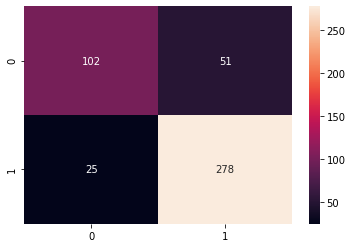

In [119]:
y_kn_Tpred= knn_model15.predict(x_test_scaled)
score= knn_model15.score(x_test_scaled, test_labels)
print('THE ACCURACY SCORE TEST SET= ',score)
cnf_kn15_test= metrics.confusion_matrix(test_labels,y_kn_Tpred)
sns.heatmap(cnf_kn15_test, annot=True, fmt='.5g')
cls_kn15_test= metrics.classification_report(test_labels, y_kn_Tpred)
print(cls_kn15_test)

# Boosting ( ADA BOOST)

In [120]:
from sklearn.ensemble import AdaBoostClassifier
adb_model = AdaBoostClassifier(n_estimators=150, random_state=1)
adb_model.fit(x_train_scaled,train_labels)

AdaBoostClassifier(n_estimators=150, random_state=1)

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       307
         1.0       0.88      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



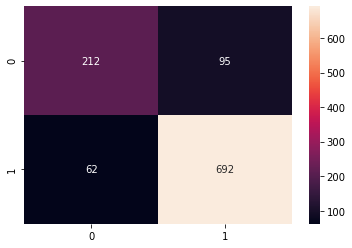

In [121]:
train_predict =adb_model.predict(x_train_scaled)
model_score= adb_model.score(x_train_scaled, train_labels)
cnf_adb_train= metrics.confusion_matrix(train_labels,train_predict)
sns.heatmap(cnf_adb_train, annot=True, fmt='.5g')
cls_adb_train= metrics.classification_report(train_labels, train_predict)
print(cls_adb_train)


              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70       153
         1.0       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.81      0.81      0.81       456



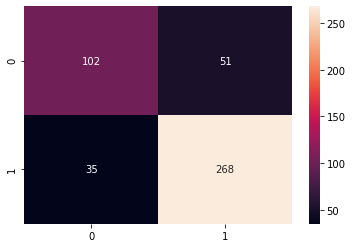

In [122]:
test_predict =adb_model.predict(x_test_scaled)
model_score= adb_model.score(x_test_scaled, test_labels)
cnf_adb_test= metrics.confusion_matrix(test_labels,test_predict)
sns.heatmap(cnf_adb_test, annot=True, fmt='.5g')
cls_adb_test= metrics.classification_report(test_labels, test_predict)
print(cls_adb_test)


# Gradient Boosting

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl= GradientBoostingClassifier(random_state=1)
gbcl= gbcl.fit(x_train_scaled, train_labels)

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       307
         1.0       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



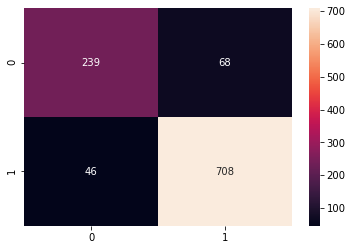

In [124]:
train_predict =gbcl.predict(x_train_scaled)
model_score= gbcl.score(x_train_scaled, train_labels)
cnf_gbcl_train= metrics.confusion_matrix(train_labels,train_predict)
sns.heatmap(cnf_gbcl_train, annot=True, fmt='.5g')
cls_gbcl_train= metrics.classification_report(train_labels, train_predict)
print(cls_gbcl_train)

              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       153
         1.0       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



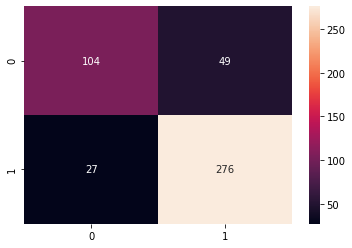

In [125]:
test_predict =gbcl.predict(x_test_scaled)
model_score= gbcl.score(x_test_scaled, test_labels)
cnf_gbcl_test= metrics.confusion_matrix(test_labels,test_predict)
sns.heatmap(cnf_gbcl_test, annot=True, fmt='.5g')
cls_gbcl_test= metrics.classification_report(test_labels, test_predict)
print(cls_gbcl_test)

# Decision Tree

In [126]:
from sklearn import tree
dt_model= tree.DecisionTreeClassifier()
dt_model.fit(x_train_scaled, train_labels)

DecisionTreeClassifier()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       307
         1.0       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



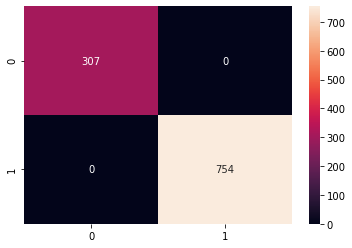

In [127]:
train_predict =dt_model.predict(x_train_scaled)
model_score= dt_model.score(x_train_scaled, train_labels)
cnf_dt_model_train= metrics.confusion_matrix(train_labels,train_predict)
sns.heatmap(cnf_dt_model_train, annot=True, fmt='.5g')
cls_dt_model_train= metrics.classification_report(train_labels, train_predict)
print(cls_dt_model_train)

              precision    recall  f1-score   support

         0.0       0.69      0.63      0.66       153
         1.0       0.82      0.85      0.84       303

    accuracy                           0.78       456
   macro avg       0.75      0.74      0.75       456
weighted avg       0.77      0.78      0.78       456



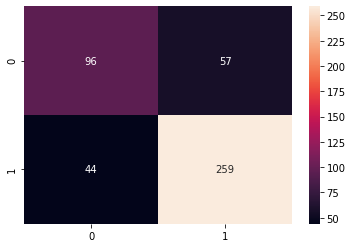

In [128]:
test_predict =dt_model.predict(x_test_scaled)
model_score= dt_model.score(x_test_scaled, test_labels)
cnf_dt_model_test= metrics.confusion_matrix(test_labels,test_predict)
sns.heatmap(cnf_dt_model_test, annot=True, fmt='.5g')
cls_dt_model_test= metrics.classification_report(test_labels, test_predict)
print(cls_dt_model_test)

# Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(n_estimators=150, random_state=1)
rf_model.fit(x_train_scaled, train_labels)

RandomForestClassifier(n_estimators=150, random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       307
         1.0       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



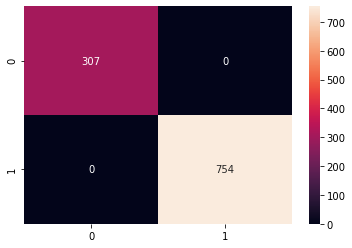

In [130]:
train_predict =rf_model.predict(x_train_scaled)
model_score= rf_model.score(x_train_scaled, train_labels)
cnf_rf_model_train= metrics.confusion_matrix(train_labels,train_predict)
sns.heatmap(cnf_rf_model_train, annot=True, fmt='.5g')
cls_rf_model_train= metrics.classification_report(train_labels, train_predict)
print(cls_rf_model_train)

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73       153
         1.0       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



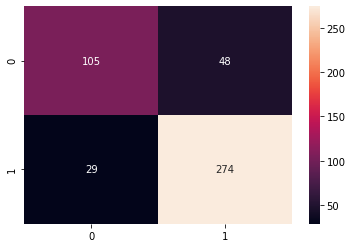

In [131]:
test_predict =rf_model.predict(x_test_scaled)
model_score= rf_model.score(x_test_scaled, test_labels)
cnf_rf_model_test= metrics.confusion_matrix(test_labels,test_predict)
sns.heatmap(cnf_rf_model_test, annot=True, fmt='.5g')
cls_rf_model_test= metrics.classification_report(test_labels, test_predict)
print(cls_rf_model_test)

# Bagging

In [132]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
ct=DecisionTreeClassifier()
bg_model= BaggingClassifier(base_estimator=ct, n_estimators=100,random_state=1)
bg_model.fit(x_train_scaled, train_labels)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       307
         1.0       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



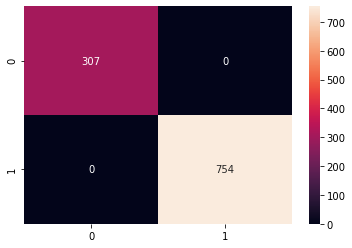

In [133]:
train_predict =bg_model.predict(x_train_scaled)
model_score= bg_model.score(x_train_scaled, train_labels)
cnf_bg_model_train= metrics.confusion_matrix(train_labels,train_predict)
sns.heatmap(cnf_bg_model_train, annot=True, fmt='.5g')
cls_bg_model_train= metrics.classification_report(train_labels, train_predict)
print(cls_bg_model_train)

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72       153
         1.0       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



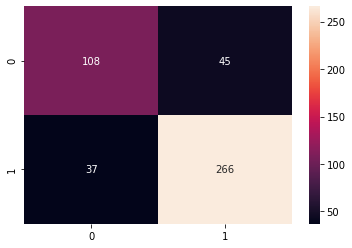

In [134]:
test_predict =bg_model.predict(x_test_scaled)
model_score= bg_model.score(x_test_scaled, test_labels)
cnf_bg_model_test= metrics.confusion_matrix(test_labels,test_predict)
sns.heatmap(cnf_bg_model_test, annot=True, fmt='.5g')
cls_bg_model_test= metrics.classification_report(test_labels, test_predict)
print(cls_bg_model_test)

#### Since there is Sampling issue we are using SMOTE to get rid of the variance between Train and Test

In [135]:
from imblearn.over_sampling import SMOTE
sm= SMOTE (random_state=1)

In [136]:
x_train_scaled_res, train_labels_res = sm.fit_resample(x_train_scaled, train_labels)

## NB with SMOTE

In [137]:
gnb_sm= gnb.fit(x_train_scaled_res, train_labels_res)

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       754
         1.0       0.83      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



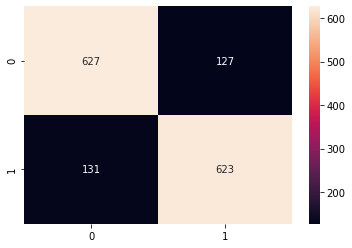

In [138]:
gnb_pred_train = gnb_sm.predict(x_train_scaled_res)
gnb_score = gnb_sm.score(x_train_scaled_res, train_labels_res)
cnf_mat_train =metrics.confusion_matrix(train_labels_res,gnb_pred_train)
sns.heatmap(cnf_mat_train, annot=True, fmt ='.5g')
cls_report_train=metrics.classification_report(train_labels_res, gnb_pred_train)
print (cls_report_train)

              precision    recall  f1-score   support

         0.0       0.68      0.82      0.74       153
         1.0       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.82      0.81      0.81       456



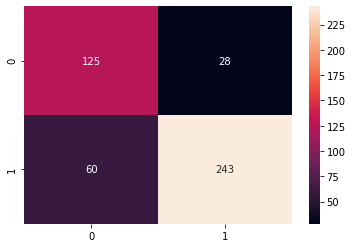

In [139]:
gnb_pred_test = gnb_sm.predict(x_test_scaled)
gnb_score = gnb_sm.score(x_test_scaled, test_labels)
cnf_mat_test =metrics.confusion_matrix(test_labels,gnb_pred_test)
sns.heatmap(cnf_mat_test, annot=True, fmt ='.5g')
cls_report_test=metrics.classification_report(test_labels, gnb_pred_test)
print (cls_report_test)

# KNN Model with Smote

In [140]:
knn_model15.fit(x_train_scaled_res, train_labels_res)

KNeighborsClassifier(n_neighbors=15)

THE ACCURACY SCORE TRAINING SET=  0.8527851458885941
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       754
         1.0       0.91      0.79      0.84       754

    accuracy                           0.85      1508
   macro avg       0.86      0.85      0.85      1508
weighted avg       0.86      0.85      0.85      1508



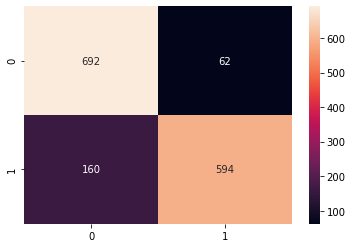

In [141]:
y_kn_pred= knn_model15.predict(x_train_scaled_res)
score= knn_model15.score(x_train_scaled_res, train_labels_res)
print('THE ACCURACY SCORE TRAINING SET= ',score)
cnf_kn15_train= metrics.confusion_matrix(train_labels_res,y_kn_pred)
sns.heatmap(cnf_kn15_train, annot=True, fmt='.5g')
cls_kn15_train= metrics.classification_report(train_labels_res, y_kn_pred)
print(cls_kn15_train)

THE ACCURACY SCORE TEST SET=  0.8070175438596491
              precision    recall  f1-score   support

         0.0       0.67      0.83      0.74       153
         1.0       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.83      0.81      0.81       456



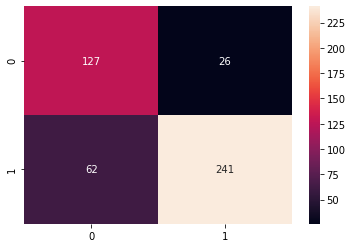

In [142]:
y_kn_Tpred= knn_model15.predict(x_test_scaled)
score= knn_model15.score(x_test_scaled, test_labels)
print('THE ACCURACY SCORE TEST SET= ',score)
cnf_kn15_test= metrics.confusion_matrix(test_labels,y_kn_Tpred)
sns.heatmap(cnf_kn15_test, annot=True, fmt='.5g')
cls_kn15_test= metrics.classification_report(test_labels, y_kn_Tpred)
print(cls_kn15_test)

since the numbers/scores are going down when we include SMOTE, we will use this in the best scorer model without SMOTE to check for the difference which is Gradient Boosting

# Gradient Boosting with SMOTE


In [143]:
gbcl= gbcl.fit(x_train_scaled_res, train_labels_res)

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       754
         1.0       0.93      0.91      0.92       754

    accuracy                           0.92      1508
   macro avg       0.92      0.92      0.92      1508
weighted avg       0.92      0.92      0.92      1508



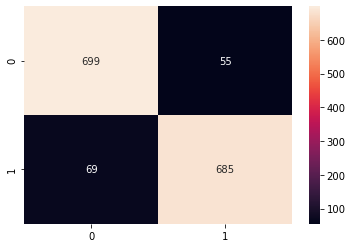

In [144]:
train_predict =gbcl.predict(x_train_scaled_res)
model_score= gbcl.score(x_train_scaled_res, train_labels_res)
cnf_gbcl_train= metrics.confusion_matrix(train_labels_res,train_predict)
sns.heatmap(cnf_gbcl_train, annot=True, fmt='.5g')
cls_gbcl_train= metrics.classification_report(train_labels_res, train_predict)
print(cls_gbcl_train)

              precision    recall  f1-score   support

         0.0       0.74      0.75      0.74       153
         1.0       0.87      0.87      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



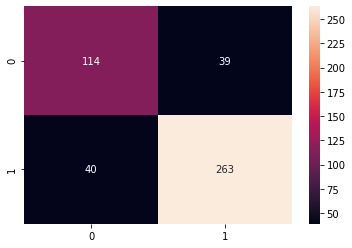

In [145]:
test_predict =gbcl.predict(x_test_scaled)
model_score= gbcl.score(x_test_scaled, test_labels)
cnf_gbcl_test= metrics.confusion_matrix(test_labels,test_predict)
sns.heatmap(cnf_gbcl_test, annot=True, fmt='.5g')
cls_gbcl_test= metrics.classification_report(test_labels, test_predict)
print(cls_gbcl_test)

1. with all the models it is noted that we reach the highest recall and accuracy scores which is consitent in both the train and test data is Gradient Boosting without SMOTE.

In [146]:
rf_model.fit(x_train_scaled_res, train_labels_res)

RandomForestClassifier(n_estimators=150, random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       754
         1.0       1.00      1.00      1.00       754

    accuracy                           1.00      1508
   macro avg       1.00      1.00      1.00      1508
weighted avg       1.00      1.00      1.00      1508



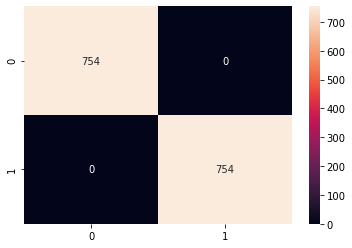

In [147]:
train_predict =rf_model.predict(x_train_scaled_res)
model_score= rf_model.score(x_train_scaled_res, train_labels_res)
cnf_rf_model_train= metrics.confusion_matrix(train_labels_res,train_predict)
sns.heatmap(cnf_rf_model_train, annot=True, fmt='.5g')
cls_rf_model_train= metrics.classification_report(train_labels_res, train_predict)
print(cls_rf_model_train)

              precision    recall  f1-score   support

         0.0       0.76      0.75      0.75       153
         1.0       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.84       456



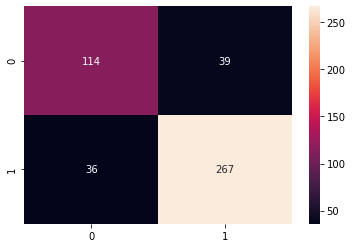

In [148]:
test_predict =rf_model.predict(x_test_scaled)
model_score= rf_model.score(x_test_scaled, test_labels)
cnf_rf_model_test= metrics.confusion_matrix(test_labels,test_predict)
sns.heatmap(cnf_rf_model_test, annot=True, fmt='.5g')
cls_rf_model_test= metrics.classification_report(test_labels, test_predict)
print(cls_rf_model_test)

In [149]:
score = pd.read_csv('Scores_compare.csv')

In [150]:
score

,Model,Accuracy_Train,Accuracy_Test,Recall Train,Recall Test,Precision_Train,Precision_Test
0,Logistic_ Regression_unscaled,0.83,0.83,0.91,0.88,0.86,0.86
1,LDA_scaled,0.83,0.83,0.91,0.88,0.86,0.86
2,Gaussian_NB_scaled,0.83,0.82,0.89,0.87,0.88,0.87
3,Knn_optimal_scaled,0.84,0.83,0.91,0.92,0.87,0.84
4,adaboosting_scaled,0.85,0.81,0.92,0.88,0.88,0.84
5,Gradboosting_scaled,0.89,0.83,0.94,0.91,0.91,0.85
6,Dtree_scaled,1.00,0.78,1.00,0.84,1.00,0.83
7,Rforest_scaled,1.00,0.83,1.00,0.90,1.00,0.85
8,Bagging_scaled,1.00,0.82,1.00,0.88,1.00,0.86
9,Gaussian_NB_scaled_smote,0.83,0.81,0.83,0.80,0.83,0.90


Performing grid search on the models ada boosting, random forest and bagging that are tree based so that we can use the tuned hyperparameters

# RandomForest Grid Search, 

In [151]:
from sklearn.model_selection import GridSearchCV

param_grid ={'min_samples_split':[20,40,60],'max_features':[2,4,6],
                 'n_estimators':[100,140,180]
                }
    
rfcl_scaled= RandomForestClassifier(random_state=1)
grid_search= GridSearchCV(estimator=rfcl_scaled,param_grid=param_grid, cv=10)

In [152]:
grid_search.fit(x_train_scaled, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': [2, 4, 6],
                         'min_samples_split': [20, 40, 60],
                         'n_estimators': [100, 140, 180]})

In [153]:
best_grid = grid_search.best_estimator_

In [154]:
best_grid

RandomForestClassifier(max_features=2, min_samples_split=20, random_state=1)

              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78       307
         1.0       0.89      0.95      0.92       754

    accuracy                           0.88      1061
   macro avg       0.87      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



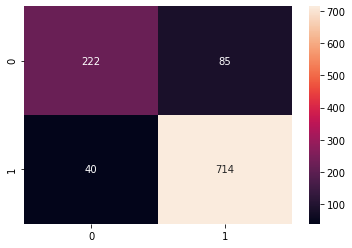

In [155]:
train_predict =grid_search.predict(x_train_scaled)
model_score= grid_search.score(x_train_scaled, train_labels)
cnf_rf_model_train= metrics.confusion_matrix(train_labels,train_predict)
sns.heatmap(cnf_rf_model_train, annot=True, fmt='.5g')
cls_rf_model_train= metrics.classification_report(train_labels, train_predict)
print(cls_rf_model_train)

              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78       307
         1.0       0.89      0.95      0.92       754

    accuracy                           0.88      1061
   macro avg       0.87      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



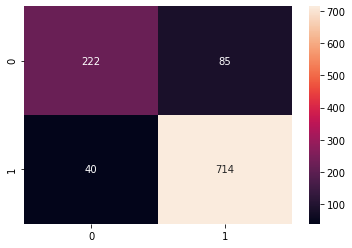

In [156]:
train_predict =best_grid.predict(x_train_scaled)
model_score= best_grid.score(x_train_scaled, train_labels)
cnf_rf_model_train= metrics.confusion_matrix(train_labels,train_predict)
sns.heatmap(cnf_rf_model_train, annot=True, fmt='.5g')
cls_rf_model_train= metrics.classification_report(train_labels, train_predict)
print(cls_rf_model_train)

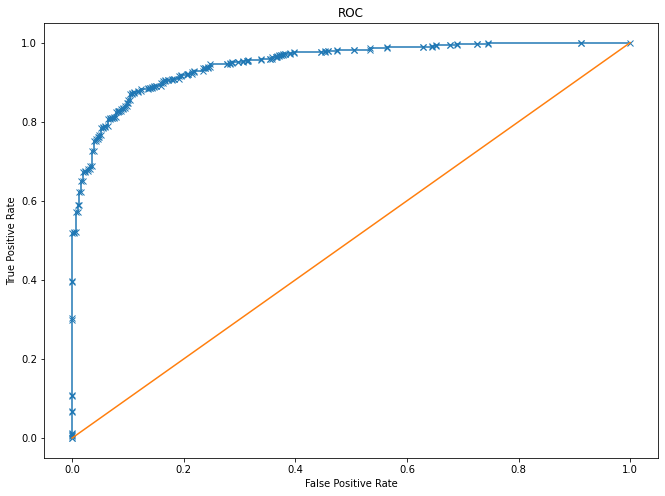

Area under Curve is 0.9478956963512731


In [157]:
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(x_train_scaled)[:,1])
plt.figure(figsize=(11,8))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(x_train_scaled)[:,1]))


              precision    recall  f1-score   support

         0.0       0.81      0.65      0.72       153
         1.0       0.84      0.92      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



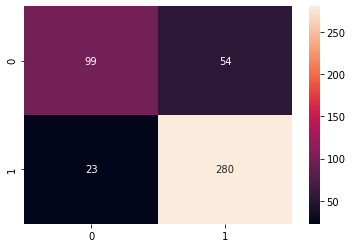

In [158]:
test_predict =best_grid.predict(x_test_scaled)
model_score= best_grid.score(x_test_scaled, test_labels)
cnf_rf_model_test= metrics.confusion_matrix(test_labels,test_predict)
sns.heatmap(cnf_rf_model_test, annot=True, fmt='.5g')
cls_rf_model_test= metrics.classification_report(test_labels, test_predict)
print(cls_rf_model_test)

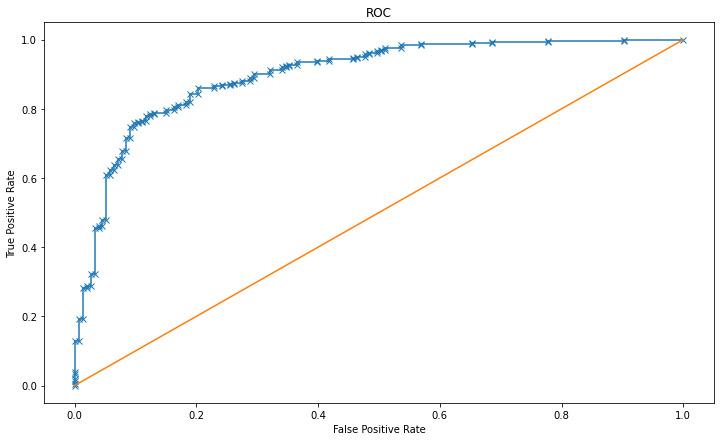

Area under Curve is 0.8985741711426044


In [159]:
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test_scaled)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(x_test_scaled)[:,1]))

Here, we can see that even when we try other values for the hyper parameters, the model performance is not improving much.

AUC is for train is 95 % and for test it is 90%. The problem of over fitting still exist, as there is a 5% gap between the train and test set. But still, the model is useful in predicting class 1.

This is because, the dataset is unbalanced.

SMOTE provided a better result hence we will try to use the best hyperparamaeters to SMOTE to see if we can improve the results.


In [160]:
grid_search.fit(x_train_scaled_res, train_labels_res)
best_grid

RandomForestClassifier(max_features=2, min_samples_split=20, random_state=1)

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       754
         1.0       0.92      0.92      0.92       754

    accuracy                           0.92      1508
   macro avg       0.92      0.92      0.92      1508
weighted avg       0.92      0.92      0.92      1508



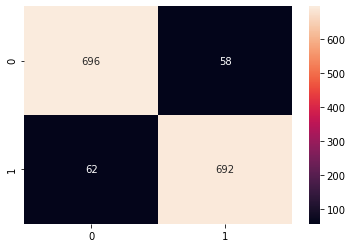

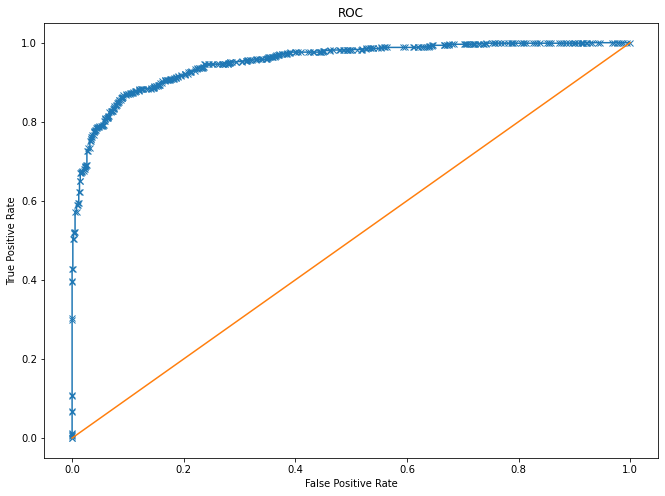

Area under Curve is 0.9509714766163133


In [161]:
train_predict =grid_search.predict(x_train_scaled_res)
model_score= grid_search.score(x_train_scaled_res, train_labels_res)
cnf_rf_model_train= metrics.confusion_matrix(train_labels_res,train_predict)
sns.heatmap(cnf_rf_model_train, annot=True, fmt='.5g')
cls_rf_model_train= metrics.classification_report(train_labels_res, train_predict)
print(cls_rf_model_train)
rf_fpr, rf_tpr,_=roc_curve(train_labels_res,best_grid.predict_proba(x_train_scaled_res)[:,1])
plt.figure(figsize=(11,8))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels_res,best_grid.predict_proba(x_train_scaled_res)[:,1]))


              precision    recall  f1-score   support

         0.0       0.81      0.65      0.72       153
         1.0       0.84      0.92      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



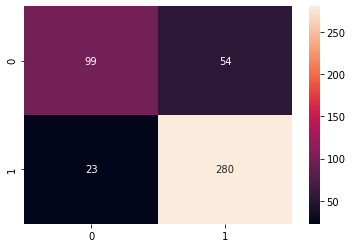

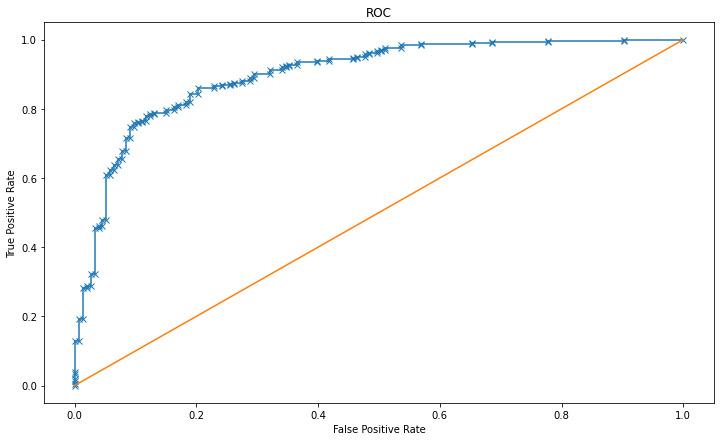

Area under Curve is 0.8985741711426044


In [162]:
test_predict =best_grid.predict(x_test_scaled)
model_score= best_grid.score(x_test_scaled, test_labels)
cnf_rf_model_test= metrics.confusion_matrix(test_labels,test_predict)
sns.heatmap(cnf_rf_model_test, annot=True, fmt='.5g')
cls_rf_model_test= metrics.classification_report(test_labels, test_predict)
print(cls_rf_model_test)
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test_scaled)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(x_test_scaled)[:,1]))

Here, we can see that using SMOTE data and the best param parameters , the model performance has improving on predicting the class and the Recall is similar in the train and the test.

Although AUC has not imporoved much for train is 95 % and for test it is 90%. The problem of over fitting still exist, as there is a 5% gap between the train and test set. But still, the model is useful in predicting class 1.

SMOTE with best param has provided a better result hence we will try to use the best hyperparamaeters with the Random Forest to create a model that predicts the vote classification amongs with the provided variables.